# Exploratory Data Analysis

## 1. Load the data

In [318]:
import string
import pandas as pd
month = "3-Mar"

table_df = pd.read_csv('data/' + month + 'Tweets.csv')
table_df.head()

,Unnamed: 0,date,language,likes,retweets,screen_name,tweet,tweet_id
0,0.0,2020-03-01 23:59:57,ja,0.0,0.0,morioka_non,COVID-19の感染拡大のおかげで、大気汚染が改善されているとな。\n\n何とも皮肉な・・・。,1.2342671633613292e+18
1,1.0,2020-03-01 23:59:40,en,0.0,0.0,lunarowl05,11 cases of coronavirus confirmed in San Anton...,1.234267091110224e+18
2,2.0,2020-03-01 23:59:48,en,0.0,0.0,specificisland,@MichaelFieldNZ For no reason whatsoever. Stup...,1.2342671220222444e+18
3,3.0,2020-03-01 23:59:55,it,4.0,2.0,SputNCIEL,Cazzarola ora è tutto più chiaro! Altro che ci...,1.2342671548973957e+18
4,4.0,2020-03-01 23:59:42,ja,0.0,1.0,tykt_nknk,COVID-19のせいで武漢上空の空気がめちゃくちゃ綺麗になっているらしくて「これもう地球の...,1.2342671001867223e+18


In [319]:
# Loop through the whole list and remove the coloumn headings,
# since they repeat after every 100 entries

for i in range(len(table_df)):
    if table_df.loc[i, "tweet"] == "tweet":
        #print(i)
        table_df=table_df.drop(index=i)

In [320]:
print(table_df.head())


   Unnamed: 0                 date language likes retweets     screen_name  \
0         0.0  2020-03-01 23:59:57       ja   0.0      0.0     morioka_non   
1         1.0  2020-03-01 23:59:40       en   0.0      0.0      lunarowl05   
2         2.0  2020-03-01 23:59:48       en   0.0      0.0  specificisland   
3         3.0  2020-03-01 23:59:55       it   4.0      2.0       SputNCIEL   
4         4.0  2020-03-01 23:59:42       ja   0.0      1.0       tykt_nknk   

                                               tweet                tweet_id  
0   COVID-19の感染拡大のおかげで、大気汚染が改善されているとな。\n\n何とも皮肉な・・・。  1.2342671633613292e+18  
1  11 cases of coronavirus confirmed in San Anton...   1.234267091110224e+18  
2  @MichaelFieldNZ For no reason whatsoever. Stup...  1.2342671220222444e+18  
3  Cazzarola ora è tutto più chiaro! Altro che ci...  1.2342671548973957e+18  
4  COVID-19のせいで武漢上空の空気がめちゃくちゃ綺麗になっているらしくて「これもう地球の...  1.2342671001867223e+18  


## 2. Removing '@' mentions
@ mentions in the tweets aren't really useful.
We can remove them from all the tweets if any tweet
mentions another user.


In [321]:
# Get the row data from the tuple returned by iterarrows()
next(table_df.iterrows())[1]

Unnamed: 0                                                    0
date                                        2020-03-01 23:59:57
language                                                     ja
likes                                                       0.0
retweets                                                    0.0
screen_name                                         morioka_non
tweet          COVID-19の感染拡大のおかげで、大気汚染が改善されているとな。\n\n何とも皮肉な・・・。
tweet_id                                 1.2342671633613292e+18
Name: 0, dtype: object

In [322]:
# Check for presence of @ character
table_df["tweet"].str.contains("@")

0        False
1        False
2         True
3        False
4        False
         ...  
30268     True
30269    False
30270     True
30271    False
30272     True
Name: tweet, Length: 29974, dtype: bool

In [323]:
# Small example showing how to remove @ mentions
import re
text="@archity how are you?"
newText=re.sub('@.*? ', '', text)
print(newText)

how are you?


In [324]:
df_clean=table_df

# Function for removing @ mentions and hyperlinks
def remove_mentions(text):
    newtext = re.sub('@.*? ', '', text)
    newtext = re.sub(r'https?:\/\/.*[\r\n]*', '', newtext)
    return newtext

df_clean['tweet']=table_df.tweet.apply(lambda x: remove_mentions(x))
print(type(df_clean.tweet))

<class 'pandas.core.series.Series'>


In [325]:
print(df_clean.head(40)["tweet"])

0      COVID-19の感染拡大のおかげで、大気汚染が改善されているとな。\n\n何とも皮肉な・・・。
1     11 cases of coronavirus confirmed in San Antonio 
2     For no reason whatsoever. Stupidity and xenoph...
3     Cazzarola ora è tutto più chiaro! Altro che ci...
4     COVID-19のせいで武漢上空の空気がめちゃくちゃ綺麗になっているらしくて「これもう地球の...
5     【感染者マップ更新／愛媛県内で初の感染例】愛媛県で新たな発表との報道がありました。愛媛県内で...
6     Reports that the Health Dept are recruiting re...
7     Hay niños, que escuchan todo el día de CHINA y...
8     Has the coronavirus outbreak entered a dire ph...
9     #Coronavirus: No in #Qatar, #Thailand GP postp...
10    Hay dos cosas más peligrosas q el #CoronaVirus...
11    has been tested for Coronavirus?? I think we n...
12    The new police issue masks might not prevent c...
13    Blaming low wage wrkrs for the spread of the c...
14    Medicare should cover the cost of coronavirus ...
15    Coronavirus discovered in Moscow\nMilan Connec...
16    Coronavirus à était un nom utilisé le temps de...
17    COVID-19って何回文章で打つんだって感じだし、会話でもcorona virus

In [326]:
# Remove punctuation marks from every tweet
# puncChars = string.punctuation
puncChars = '''!()-[]{};:'"\,<>./?@#$%^&*_~’‘´'''
print(type(puncChars))

for index in df_clean.index:
    word = df_clean['tweet'][index]
    for ele in word:  
        if ele in puncChars:  
            df_clean['tweet'][index] = df_clean['tweet'][index].replace(ele, "")
# Get the data type of each coloumn
#print(df_clean.dtypes)

<class 'str'>


c:\users\archi\pycharmprojects\covid_twitter_trends\venv\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [327]:
print(df_clean.head(40)["tweet"])

0       COVID19の感染拡大のおかげで、大気汚染が改善されているとな。\n\n何とも皮肉な・・・。
1     11 cases of coronavirus confirmed in San Antonio 
2     For no reason whatsoever Stupidity and xenopho...
3     Cazzarola ora è tutto più chiaro Altro che cin...
4     COVID19のせいで武漢上空の空気がめちゃくちゃ綺麗になっているらしくて「これもう地球の救...
5     【感染者マップ更新／愛媛県内で初の感染例】愛媛県で新たな発表との報道がありました。愛媛県内で...
6     Reports that the Health Dept are recruiting re...
7     Hay niños que escuchan todo el día de CHINA y ...
8     Has the coronavirus outbreak entered a dire ph...
9     Coronavirus No in Qatar Thailand GP postponed ...
10    Hay dos cosas más peligrosas q el CoronaVirus ...
11    has been tested for Coronavirus I think we nee...
12    The new police issue masks might not prevent c...
13    Blaming low wage wrkrs for the spread of the c...
14    Medicare should cover the cost of coronavirus ...
15    Coronavirus discovered in Moscow\nMilan Connec...
16    Coronavirus à était un nom utilisé le temps de...
17    COVID19って何回文章で打つんだって感じだし、会話でもcorona virusっ

In [328]:
# Go through each tweet and put individual word into a list
from collections import Counter

print("Coloumn tweet type: ", type(df_clean.tweet))

word_list = []

for tweet in df_clean.tweet:
    word_list+=(tweet.split())


#word_list[:100]
print(Counter(word_list).most_common(20))
print(type(word_list))
print(len(word_list), "total words")

Coloumn tweet type:  <class 'pandas.core.series.Series'>
[('the', 13823), ('coronavirus', 12471), ('to', 11018), ('a', 10013), ('de', 9454), ('of', 6864), ('and', 6220), ('COVID19', 6105), ('Coronavirus', 5706), ('in', 5566), ('que', 5302), ('el', 5191), ('is', 4902), ('la', 4383), ('for', 4346), ('en', 3917), ('y', 3263), ('I', 3029), ('on', 2982), ('no', 2849)]
<class 'list'>
634681 total words


Some remarks-

* We can see that there are several article words (a, an , the), prepositions (in, of), as well as non-English prepositions (en, de) So we need to remove such non-essential words.
* 'coronavirus' and 'coronavirus.' (with a dot) are taken as two seperate words. So we may need to remove all such punctuation marks.
* 'Coronavirus' and 'coronavirus' are also treaded as two different words, so we need to take care of upper/lower case letters. 

In [329]:
# Convert all the letters of words to lowercase
word_list_lower = list(map(lambda x:x.lower(), word_list))

# Get the count values of all the words
words_counter = Counter(word_list_lower).most_common()

# Convert the Counter list to a Pandas dataframe
words_counter_df = pd.DataFrame.from_records(list(dict(words_counter).items()), columns=['word', 'count'])

print(len(word_list_lower), "total words")
print(len(Counter(word_list_lower)), "unique words")


with open('all-words.txt', 'w', encoding="utf-8") as filehandle:
    for listitem in word_list_lower:
        filehandle.write('%s\n' % listitem)
words_counter_df[:20]


634681 total words
72475 unique words


,word,count
0,coronavirus,18907
1,the,15757
2,to,11378
3,a,10908
4,covid19,10002
5,de,9764
6,of,7009
7,and,6582
8,el,6163
9,in,5992


In [330]:
import itertools

# Remove English, French and Spanish Parts of Speech (PoS) words
english_pos = ["a", "an", "the", "in", "on", "of", "for", "to", "by", "at", "till", "until", "i", "as", "it", "he", "she", "you", "via", "and"]
french_pos = ["en", "de", "le", "la", "les", "des", "à", "un", "une", "se"]
spanish_pos = ["el", "por", "que"]

for word1, word2, word3 in itertools.zip_longest(english_pos, french_pos, spanish_pos):
    words_counter_df.drop(words_counter_df[words_counter_df.word == word1].index, inplace=True)
    words_counter_df.drop(words_counter_df[words_counter_df.word == word2].index, inplace=True)
    words_counter_df.drop(words_counter_df[words_counter_df.word == word3].index, inplace=True)
    #print(word1, word2, word3)

words_counter_df.reset_index()
words_counter_df[:20]

* We see that there are too many different types of PoS words that are coming across. It's better to utilize Python's NLTK library for further refinement.

In [331]:
df_clean.tweet.loc[1]

'11 cases of coronavirus confirmed in San Antonio '

In [332]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\archi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\archi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

words_counter_df = words_counter_df.reset_index(drop=True)

words = words_counter_df['word']
word_list = words.values.tolist()
print(word_list[:10])

# Tag all the unique words with POS tagging
tagged_word = nltk.pos_tag(word_list)


tagged_word[:20]

Let's try to download NLTK's stopwords database for English, French, and Spanish


In [333]:
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\archi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [334]:
stopwords_english = stopwords.words('english') 
stopwords_french = stopwords.words('french')
stopwords_spanish = stopwords.words('spanish')

print('Stop words\n')
print(stopwords_english)
print(stopwords_french)
print(stopwords_spanish)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [335]:
for word1, word2, word3, punc in itertools.zip_longest(stopwords_english, stopwords_french, stopwords_spanish, string.punctuation):
    words_counter_df.drop(words_counter_df[words_counter_df.word == word1].index, inplace=True)
    words_counter_df.drop(words_counter_df[words_counter_df.word == word2].index, inplace=True)
    words_counter_df.drop(words_counter_df[words_counter_df.word == word3].index, inplace=True)
    words_counter_df.drop(words_counter_df[words_counter_df.word == punc].index, inplace=True)

#words_counter_df.reset_index()

In [336]:
# Now we remove words like covid, coronavirus
covidWords = ["covid", "coronavirus", "covid-19", "covid19"]
for covword in covidWords:
    words_counter_df.drop(words_counter_df[words_counter_df.word == covword].index, inplace=True)

# Remove "&amp;". It occurs several times ('&' and ';' have already been removed)
words_counter_df.drop(words_counter_df[words_counter_df.word == "amp"].index, inplace=True)

words_counter_df = words_counter_df.reset_index(drop=True)
words_counter_df[:20]

print(words_counter_df[:20])
print("Total unique words: ", words_counter_df.size)

           word  count
0        people   1667
1            us   1261
2         trump   1181
3         virus   1061
4           get    928
5   coronavírus    911
6         cases    889
7            si    866
8           new    860
9          like    836
10         dont    777
11           im    763
12          one    729
13        casos    727
14       health    679
15         news    659
16         time    645
17     pandemic    644
18           19    600
19          due    597
Total unique words:  144036


## Word Cloud

In [337]:
# Rename the column 'count' to 'freq'
words_counter_df.columns = ['word', 'freq']

# Convert pd dataframe to dictionary for input for wordcould
wordcount_dict = dict(zip(words_counter_df.word, words_counter_df.freq))
# Print first 10 items of this dict
print(list(wordcount_dict.items())[0:10])

[('people', 1667), ('us', 1261), ('trump', 1181), ('virus', 1061), ('get', 928), ('coronavírus', 911), ('cases', 889), ('si', 866), ('new', 860), ('like', 836)]


In [338]:
#print(words_counter_df['freq'].where(words_counter_df['word']=='&amp;'))
#words_counter_df.lookup(words_counter_df.word, words_counter_df.freq)

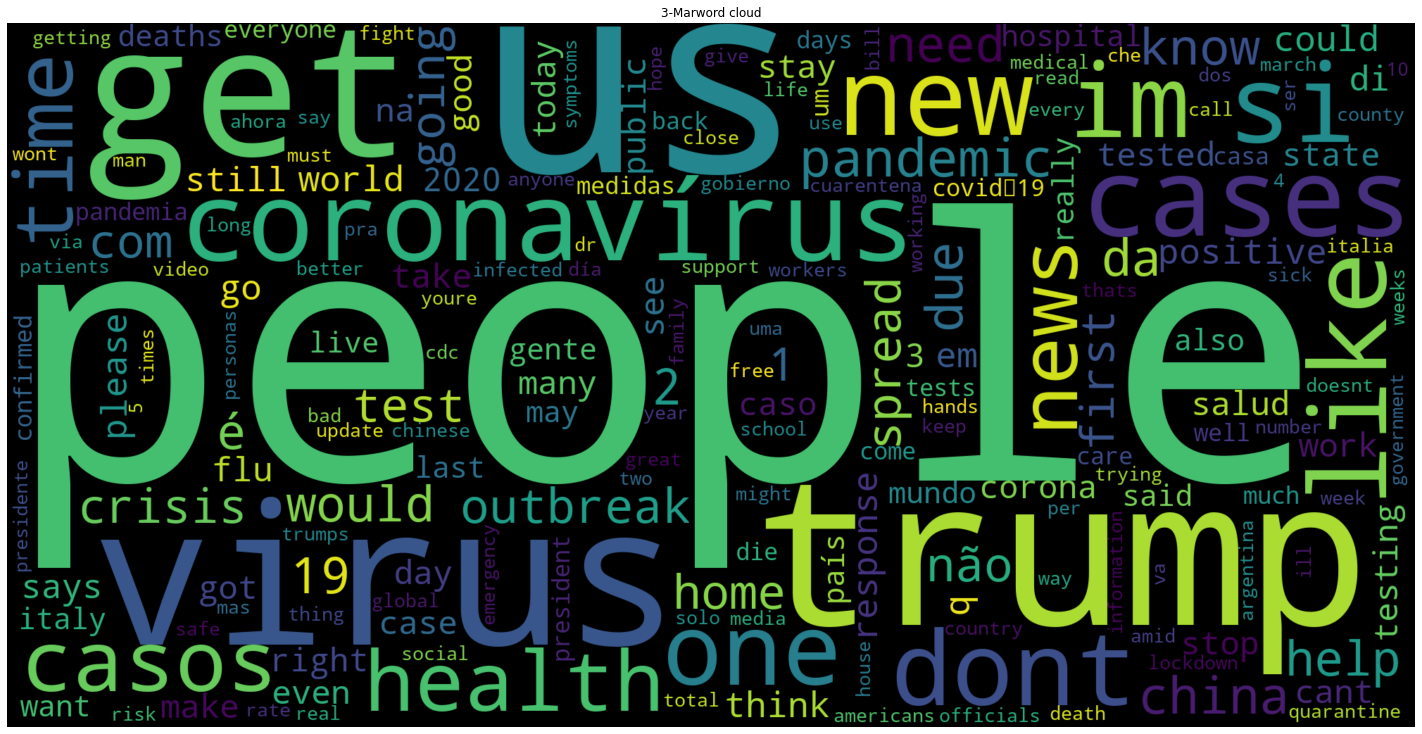

In [339]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=2000, height=1000).generate_from_frequencies(wordcount_dict)
plt.figure( figsize=(20,10) )
plt.imshow(wc, interpolation='bilinear')
plt.title(month + 'word cloud')
plt.axis('off')
plt.tight_layout(pad=0)
#plt.show()
wc.to_file('img/wordcloud_' + month + '.png')
#plt.savefig("img/wordcloud_jan.png", format="png")

        
